# Sprawdzenie działania wytrenowanego modelu

In [7]:
import cv2
from ultralytics import YOLO
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
model = YOLO('runs/detect/train3/weights/best.pt') #TODO: Zamienić na najnowszy w razie szkolenia nowego!!!!

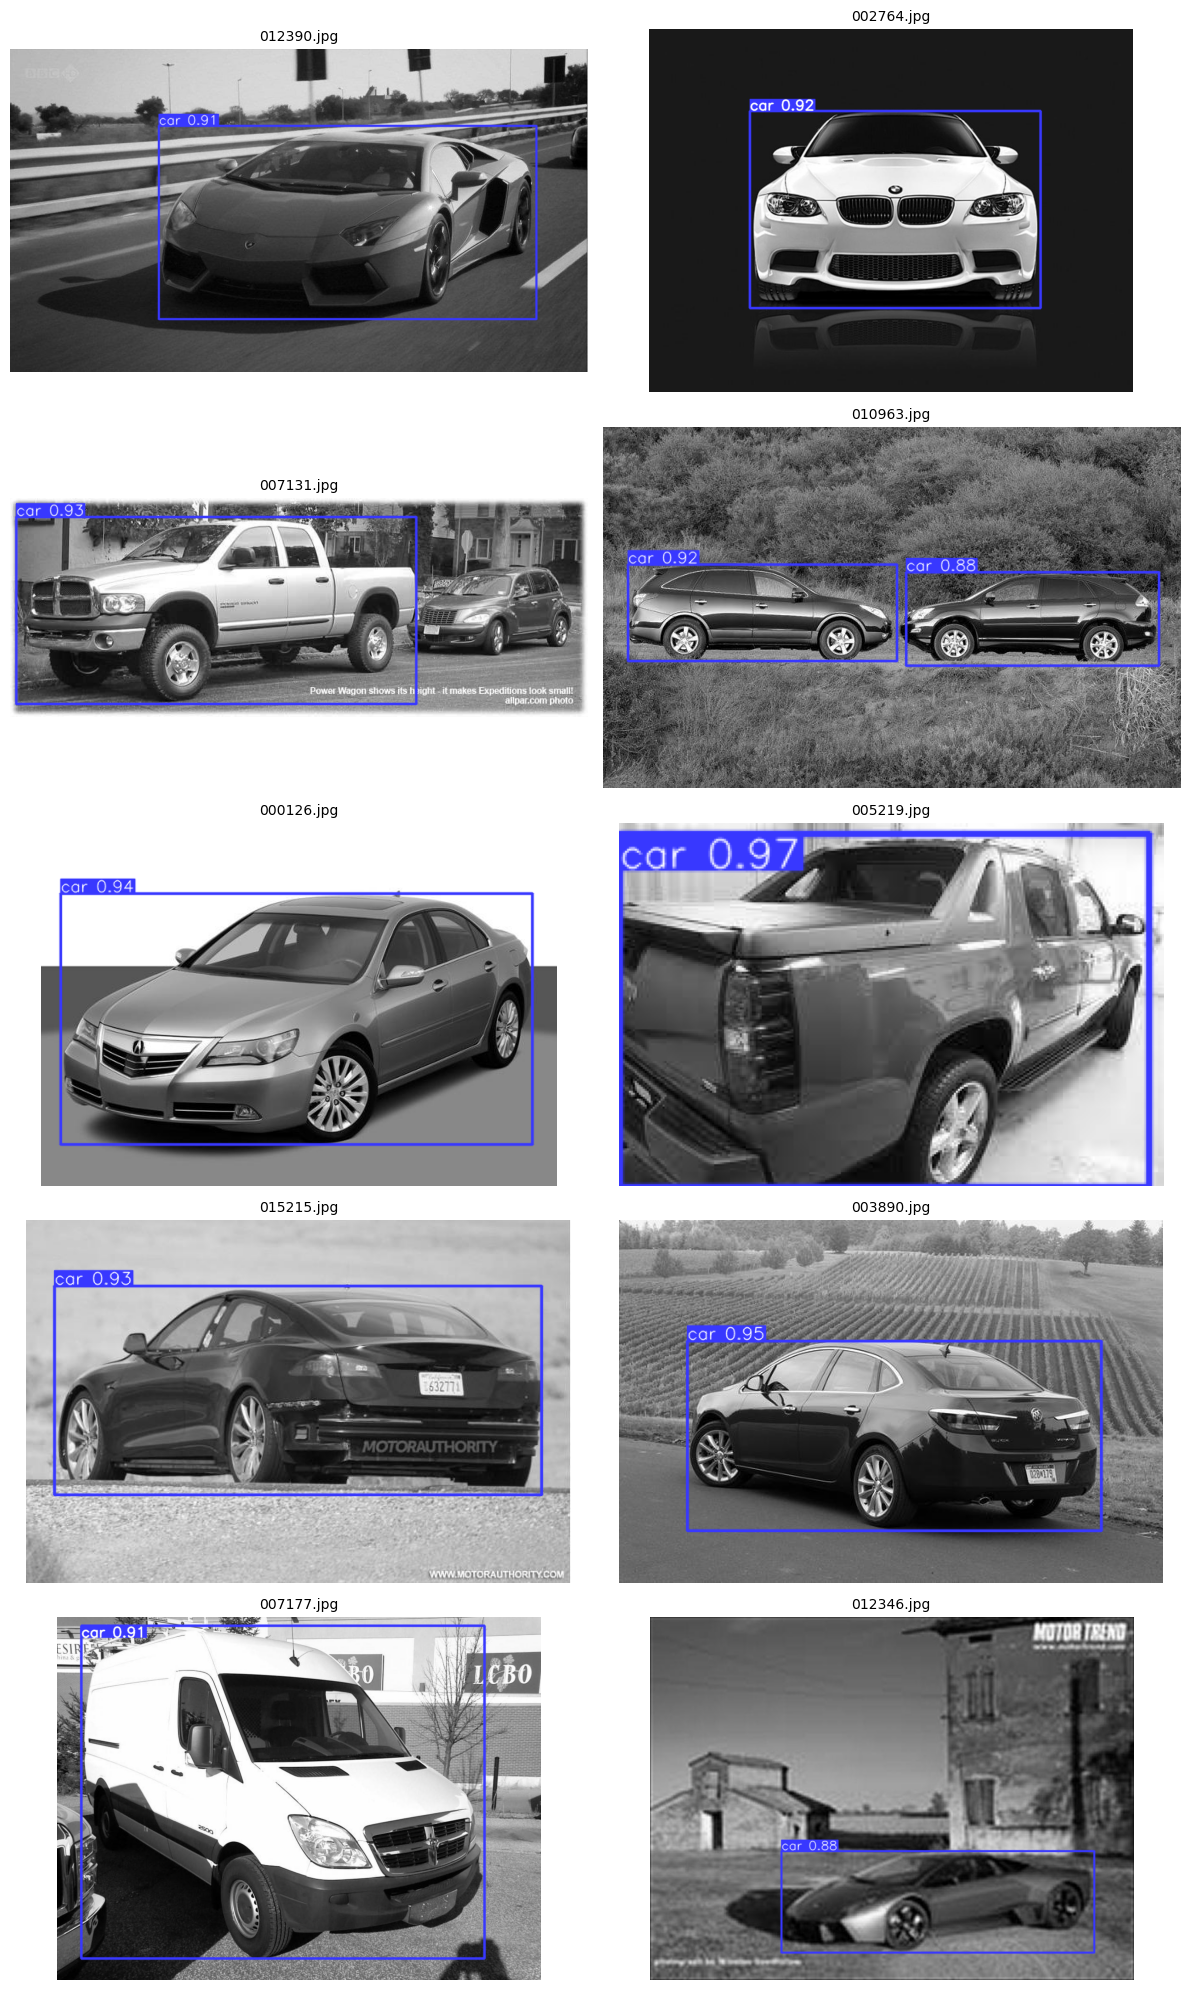

In [18]:
image_folder = 'data/valid/images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
random_images = random.sample(image_files, min(10, len(image_files)))

fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()

for idx, img_name in enumerate(random_images):
    img_path = os.path.join(image_folder, img_name)

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model.predict(source=img_rgb, save=False, imgsz=640, conf=0.25, verbose=False)
    pred_img = results[0].plot()

    axes[idx].imshow(pred_img)
    axes[idx].set_title(f'{img_name}', fontsize=10)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()